In [1]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
# path = '/media/simon/5fe8f8f8-e95a-4dd8-bd2c-f3a65bd4d247/home/simon/PycharmProjects/invasionlgca/raw_configs/isotropic_ecm/'
path = '/home/simon/PycharmProjects/invasionlgca/parameter_scans/bigscan/'
params = np.load(path+'parameters.npz')
betas = params['betas']
ecms = params['ecmdens']
l_spheroid = params['l_spheroid']
lb = len(betas)
lecm = len(ecms)
observables = np.load(path+'observables.npz')
glob_speed = observables['glob_speed']
loc_speed = observables['loc_speed']
correlations = observables['correlations']
vorticity = observables ['vorticity']
single_cells = observables['single_cells']

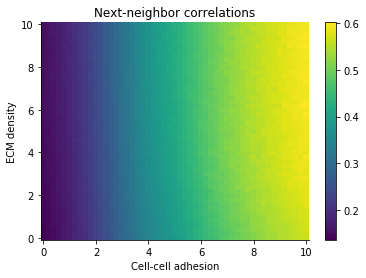

In [2]:
%matplotlib inline
dbeta = betas[1] - betas[0]
decm = ecms[1] - ecms[0]
x = np.linspace(betas.min() - dbeta/2, betas.max() + dbeta/2, len(betas)+1)
y = np.linspace(ecms.min() - decm/2, ecms.max() + decm/2, len(ecms)+1)
#plt.imshow(corrs.T, origin='lower')
#plt.contourf(betas, ecms, corrs.T)
plt.title('Next-neighbor correlations')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.pcolormesh(x, y, correlations.T)
plt.colorbar()
#plt.savefig(path+'correlations.png', dpi=600)

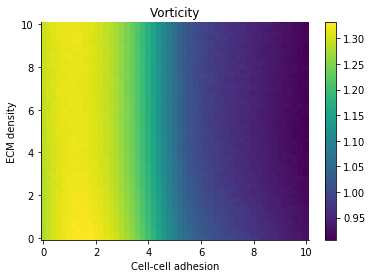

In [63]:
#plt.contourf(betas, ecms, vorticity.T)
plt.pcolormesh(x, y, vorticity.T)
plt.title('Vorticity')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.colorbar()

Text(0, 0.5, 'Normalized speed')

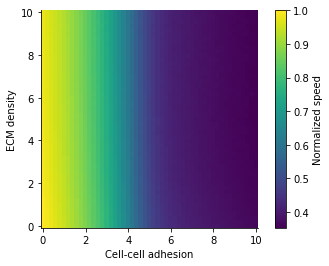

In [9]:
#plt.contour(betas, ecms, glob_speed.T/glob_speed.max(), cmap='Reds')
plt.pcolormesh(x, y, loc_speed.T/loc_speed.max())
ax = plt.gca()
ax.set_aspect('equal')
#plt.imshow(loc_speed.T)
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Normalized speed')

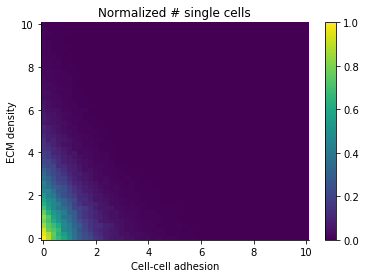

In [65]:
#plt.contourf(betas, ecms, single_cells.T/single_cells.max())
plt.pcolormesh(x, y, single_cells.T/single_cells.max())
plt.title('Normalized # single cells')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.colorbar()
#plt.savefig(path+'single_cells.png', dpi=600)

In [13]:
%matplotlib notebook

In [100]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cutoff2 = -1
cutoff1 = 1
from scipy.ndimage.filters import gaussian_filter
sigma = 1
filtered_corrs = gaussian_filter(correlations, sigma)
filtered_scs = gaussian_filter(single_cells, sigma)
corrplot = filtered_corrs[cutoff1:cutoff2, cutoff1:cutoff2]
clrsplot = filtered_scs[cutoff1:cutoff2, cutoff1:cutoff2]
scsmax = clrsplot.max()
clrsplot /= scsmax

In [101]:
betas

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ])

<IPython.core.display.Javascript object>


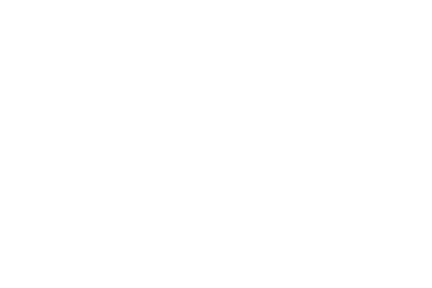

NameError: name 'corrplot' is not defined

<IPython.core.display.Javascript object>


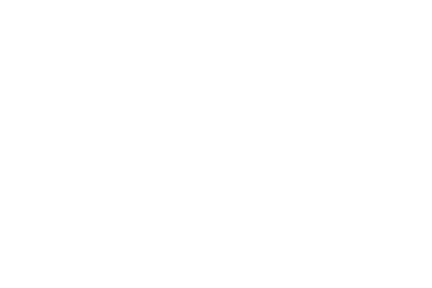

In [19]:
X, Y = np.meshgrid(ecms[cutoff1:cutoff2] -decm/2, betas[cutoff1:cutoff2] - dbeta/2)
fig = plt.figure()#figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap()
ax.plot_surface(np.log10(X), np.log10(Y), corrplot, facecolors=cmap(clrsplot), antialiased=True,
                shade=False, rstride=1, cstride=1)
ax.set_xlabel('ECM density')
ax.set_ylabel('Cell-cell adhesion')
ax.set_zlabel('Velocity correlation')
ticks = [0.1, 0.2, 0.5, 1, 2, 5, 10]
ax.set_xticks(np.log10(ticks))
ax.set_xticklabels(ticks)
ax.set_xticks(np.log10(ticks))
ax.set_xticklabels(ticks)
ax.set_yticks(np.log10(ticks))
ax.set_yticklabels(ticks)
zticks = [0.1, 0.3, 0.5]
ax.set_zticks(zticks)
ax.set_zticklabels(zticks)
m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(clrsplot)
cbar = plt.colorbar(m)
cbar.ax.get_yaxis().set_ticks([0, 1])
cbar.ax.get_yaxis().set_ticklabels([0, 100])
cbar.ax.set_ylabel('Single cells (%)')
ax.view_init(40, -130)
plt.tight_layout()
plt.savefig('phasediagram.svg', bbox_inches='tight', transparent=True, dpi=600)

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cutoff2 = -1
cutoff1 = 1
X, Y = np.meshgrid(1/ecms[cutoff1:cutoff2], 1/betas[cutoff1:cutoff2])
cmap = plt.get_cmap()

In [68]:
from scipy.ndimage.filters import gaussian_filter
sigma = 1
filtered_corrs = gaussian_filter(correlations, sigma)
filtered_scs = gaussian_filter(single_cells, sigma)
corrplot = filtered_corrs[cutoff1:cutoff2, cutoff1:cutoff2]
clrsplot = filtered_scs[cutoff1:cutoff2, cutoff1:cutoff2]
scsmax = clrsplot.max()
# print(X.shape, Y.shape, corrplot.shape, clrsplot.shape)
#print(ecms)
#print(betas)
#print(1/ecms[cutoff1:cutoff2])
#print(1/betas[cutoff1:cutoff2])

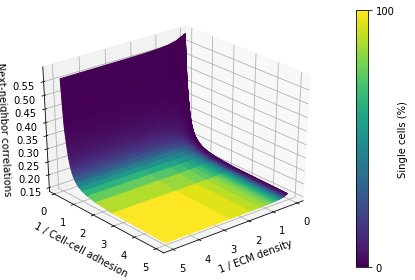

In [69]:
fig = plt.figure()#figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, corrplot, facecolors=cmap(clrsplot/scsmax), antialiased=True,
                shade=False, rstride=1, cstride=1)
ax.set_xlabel('1 / ECM density')
ax.set_ylabel('1 / Cell-cell adhesion')
ax.set_zlabel('Next-neighbor correlations')
#ax.set_zlim(0, 1)
m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(single_cells[cutoff1:cutoff2, cutoff1:cutoff2]/single_cells[cutoff1:cutoff2, cutoff1:cutoff2].max())
cbar = plt.colorbar(m)
cbar.ax.get_yaxis().set_ticks([0., 1.])
cbar.ax.get_yaxis().set_ticklabels([0, 100])
cbar.ax.set_ylabel('Single cells (%)')
ax.view_init(30, 50)
plt.tight_layout()
# plt.savefig('phasediagram.svg', bbox_inches='tight', transparent=True, dpi=600)

<IPython.core.display.Javascript object>


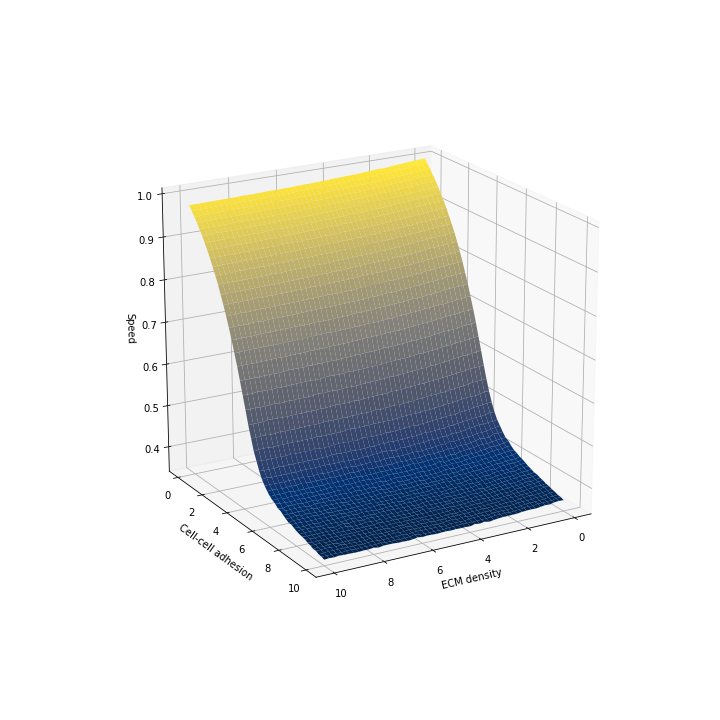

In [38]:
%matplotlib notebook
X, Y = np.meshgrid(ecms, betas)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, loc_speed/loc_speed.max(), cmap='cividis', antialiased=True,
                shade=False, rstride=1, cstride=1)
ax.set_xlabel('ECM density')
ax.set_ylabel('Cell-cell adhesion')
ax.set_zlabel('Speed')
ax.view_init(20, 60)
plt.savefig('figures/speed.svg', bbox_inches=0, transparent=True, dpi=600)